## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [11]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

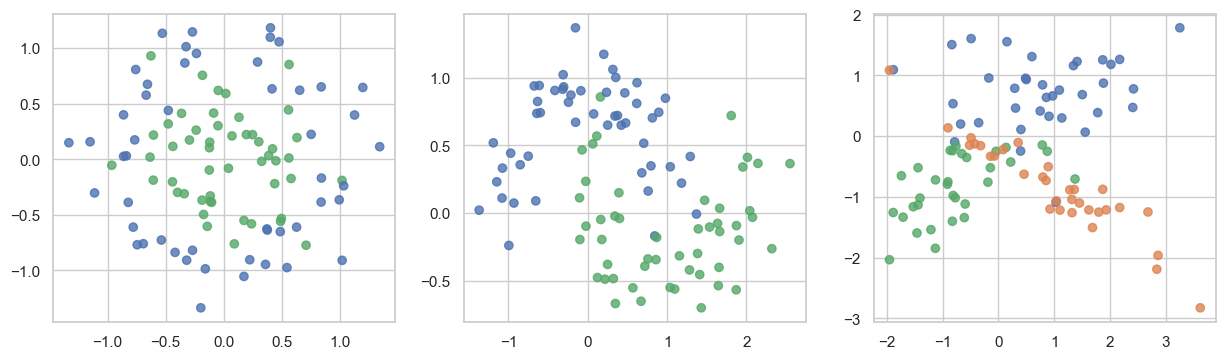

In [12]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

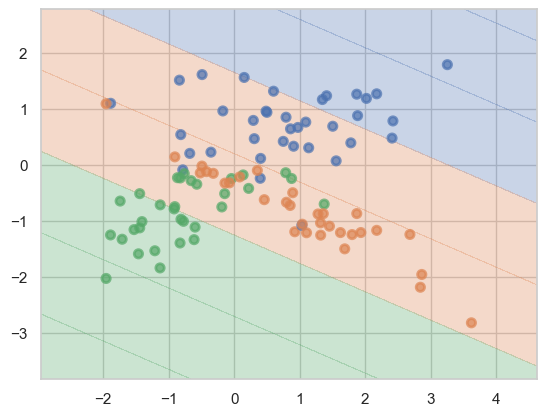

In [14]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

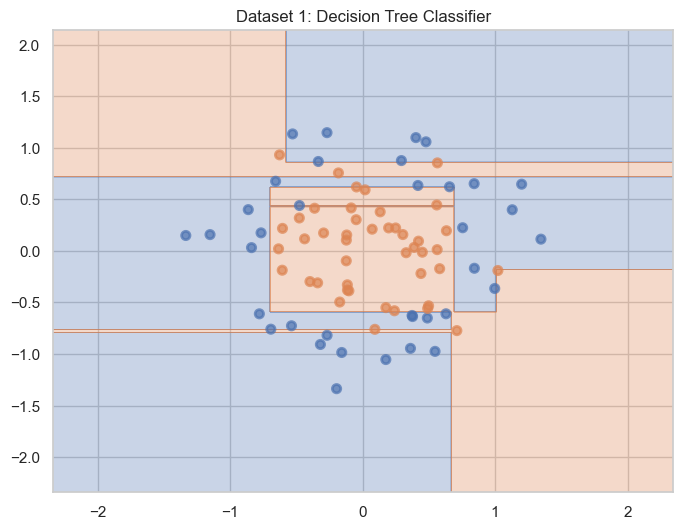

Dataset 1:
Accuracy on training set: 1.00
Accuracy on test set: 0.65


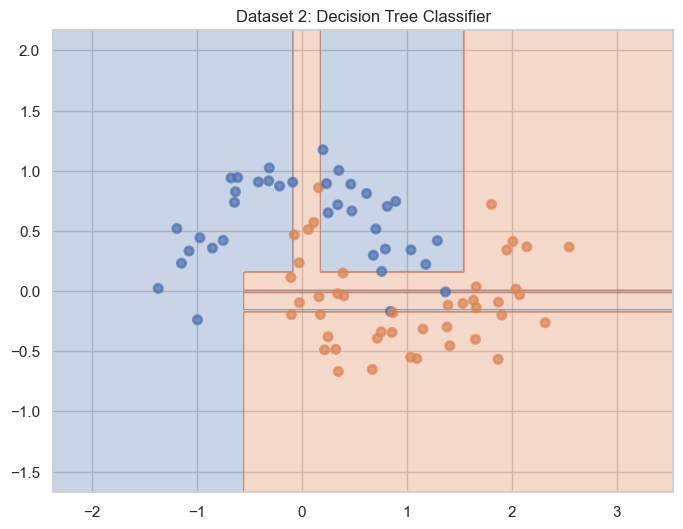

Dataset 2:
Accuracy on training set: 1.00
Accuracy on test set: 0.95


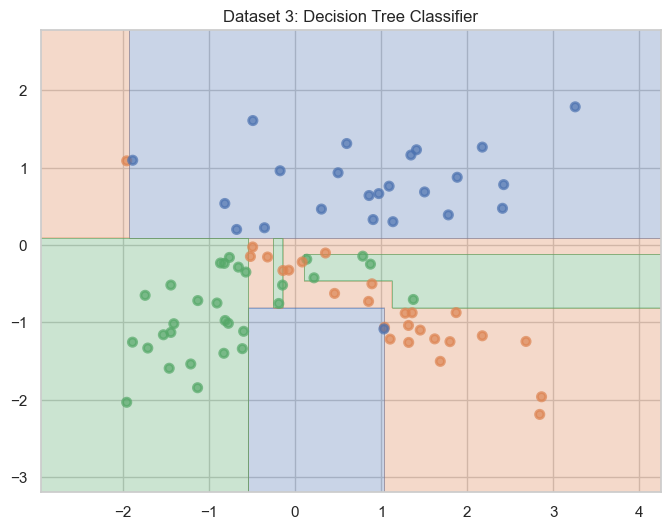

Dataset 3:
Accuracy on training set: 1.00
Accuracy on test set: 0.70


In [16]:
# Цикл по датасетам
for i, (X, y) in enumerate(datasets):
    # Шаг 1: Разбиваем данные на обучающую и тестовую выборки (80% обучающих данных, 20% тестовых данных)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Шаг 2: Обучаем решающее дерево с параметрами по умолчанию
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Шаг 3: Визуализируем разделяющие поверхности
    plt.figure(figsize=(8, 6))
    plot_surface(clf, X_train, y_train)  # Разделяющая поверхность для обучающей выборки
    plt.title(f'Dataset {i+1}: Decision Tree Classifier')
    plt.show()
    
    # Шаг 4: Оцениваем точность на обучающей и тестовой выборках
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    print(f'Dataset {i+1}:')
    print(f'Accuracy on training set: {train_accuracy:.2f}')
    print(f'Accuracy on test set: {test_accuracy:.2f}')
    


__Ответ:__
Для определения того, переобучились ли решающие деревья, можно проанализировать разницу в точности между обучающим и тестовым наборами данных.

- **Если точность на обучающем наборе значительно выше, чем на тестовом**, это может быть признаком переобучения. Это означает, что модель хорошо подстроилась под обучающие данные, но не обобщается хорошо на новые, ранее не виденные данные.

- **Если точность на обучающем и тестовом наборах схожи или различаются незначительно**, это может быть признаком того, что модель неплохо обобщает данные и не переобучена.


Так как точность на тестовой выборке ниже, чем на обучающей выборке, это может быть признаком переобучения.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Лучшие параметры для датасета 1: {'max_depth': 5, 'min_samples_leaf': 2}


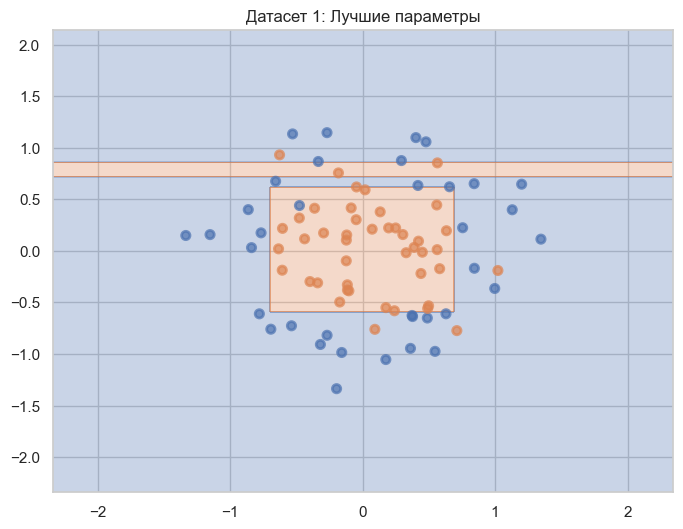

Точность на обучающей выборке: 0.94
Точность на тестовой выборке: 0.80
Лучшие параметры для датасета 2: {'max_depth': 5, 'min_samples_leaf': 1}


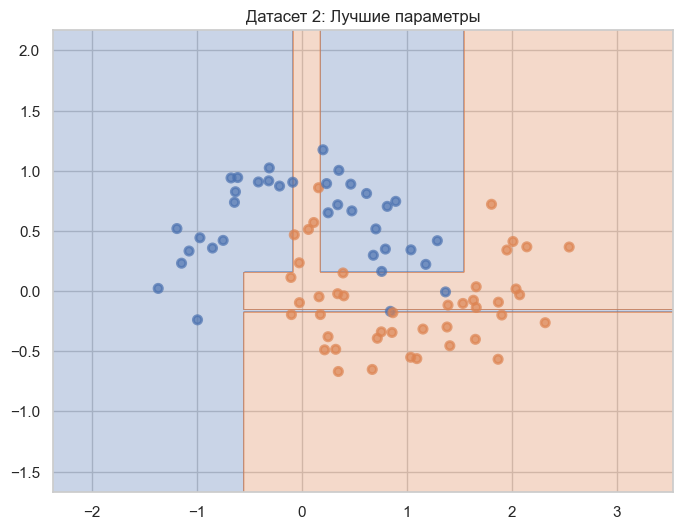

Точность на обучающей выборке: 0.99
Точность на тестовой выборке: 0.95
Лучшие параметры для датасета 3: {'max_depth': 3, 'min_samples_leaf': 2}


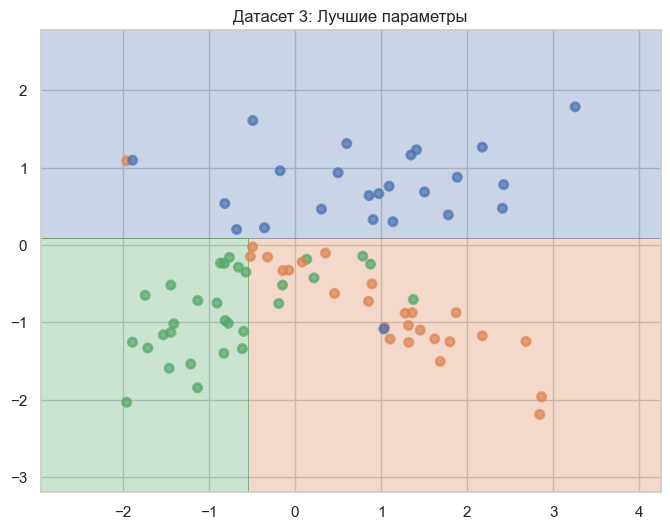

Точность на обучающей выборке: 0.89
Точность на тестовой выборке: 0.75


In [18]:
from sklearn.model_selection import GridSearchCV

# Сетка параметров для перебора
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Цикл по датасетам
for i, (X, y) in enumerate(datasets):
    # Разбиваем данные на обучающую и тестовую выборки (80% обучающих данных, 20% тестовых данных)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Создаем решающее дерево
    clf = DecisionTreeClassifier(random_state=42)
    
    # Используем GridSearchCV для перебора параметров с кросс-валидацией (cv=3 для трехфолдовой кросс-валидации)
    grid_search = GridSearchCV(clf, param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Выводим лучшие параметры
    print(f'Лучшие параметры для датасета {i+1}: {grid_search.best_params_}')
    
    # Визуализируем разделяющую поверхность с лучшими параметрами
    plt.figure(figsize=(8, 6))
    plot_surface(grid_search, X_train, y_train)  # Разделяющая поверхность для обучающей выборки
    plt.title(f'Датасет {i+1}: Лучшие параметры')
    plt.show()
    
    # Вычисляем ошибки
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = grid_search.score(X_test, y_test)
    
    print(f'Точность на обучающей выборке: {train_accuracy:.2f}')
    print(f'Точность на тестовой выборке: {test_accuracy:.2f}')
    


__Ответ:__
Изменение разделяющей поверхности и обобщающей способности будет зависеть от выбранных гиперпараметров решающего дерева и конкретного датасета. Вот какие изменения могут происходить:

1. **Максимальная глубина дерева (max_depth)**: При увеличении значения `max_depth`, разделяющая поверхность становится более сложной и способной подстраиваться под детали обучающих данных. Однако, с увеличением глубины, модель может стать более склонной к переобучению, что может привести к ухудшению обобщающей способности. Наилучшая глубина дерева будет зависеть от конкретного датасета.

2. **Минимальное количество примеров в листе (min_samples_leaf)**: Увеличение значения `min_samples_leaf` приводит к упрощению разделяющей поверхности, так как оно устанавливает минимальное количество примеров, необходимых для создания листовых узлов. Это может способствовать борьбе с переобучением, поскольку модель становится менее склонной к подгонке к маленьким выбросам. Однако, слишком больное значение `min_samples_leaf` может привести к слишком простой модели и ухудшению точности.

3. **Разные датасеты**: Изменение гиперпараметров может влиять по-разному на разные датасеты. Некоторые датасеты могут требовать более сложных моделей для хорошей разделяющей поверхности, в то время как для других простые модели могут быть более подходящими. Поэтому изменение будет разным для разных датасетов.

Обобщающая способность будет зависеть от баланса между сложностью модели и количеством доступных данных. Если модель слишком сложная и переобучена, то она не сможет обобщать данные. Если модель слишком простая, она может потерять важные детали из данных.

Поэтому важно подбирать гиперпараметры внимательно, с учетом конкретного датасета, и использовать кросс-валидацию для оценки обобщающей способности модели.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

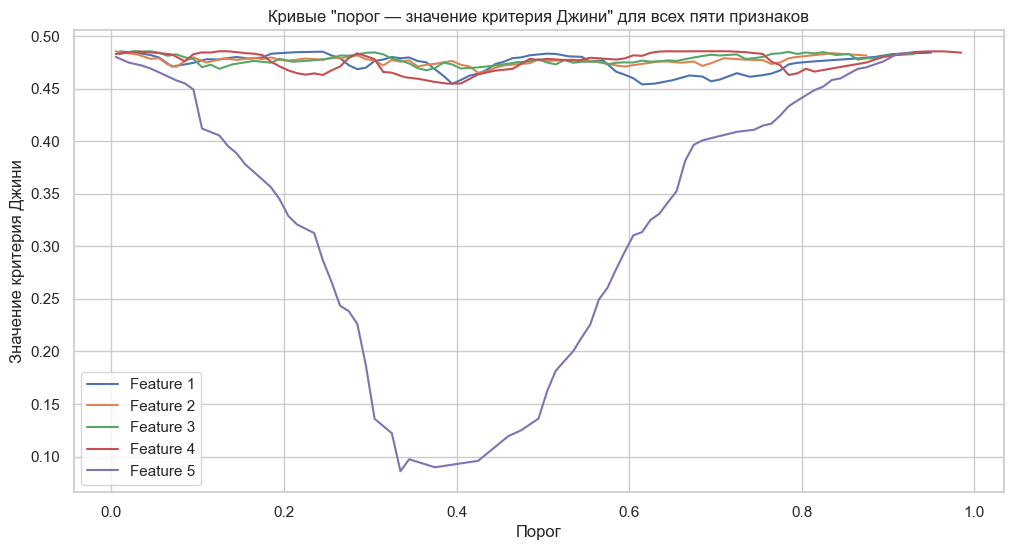

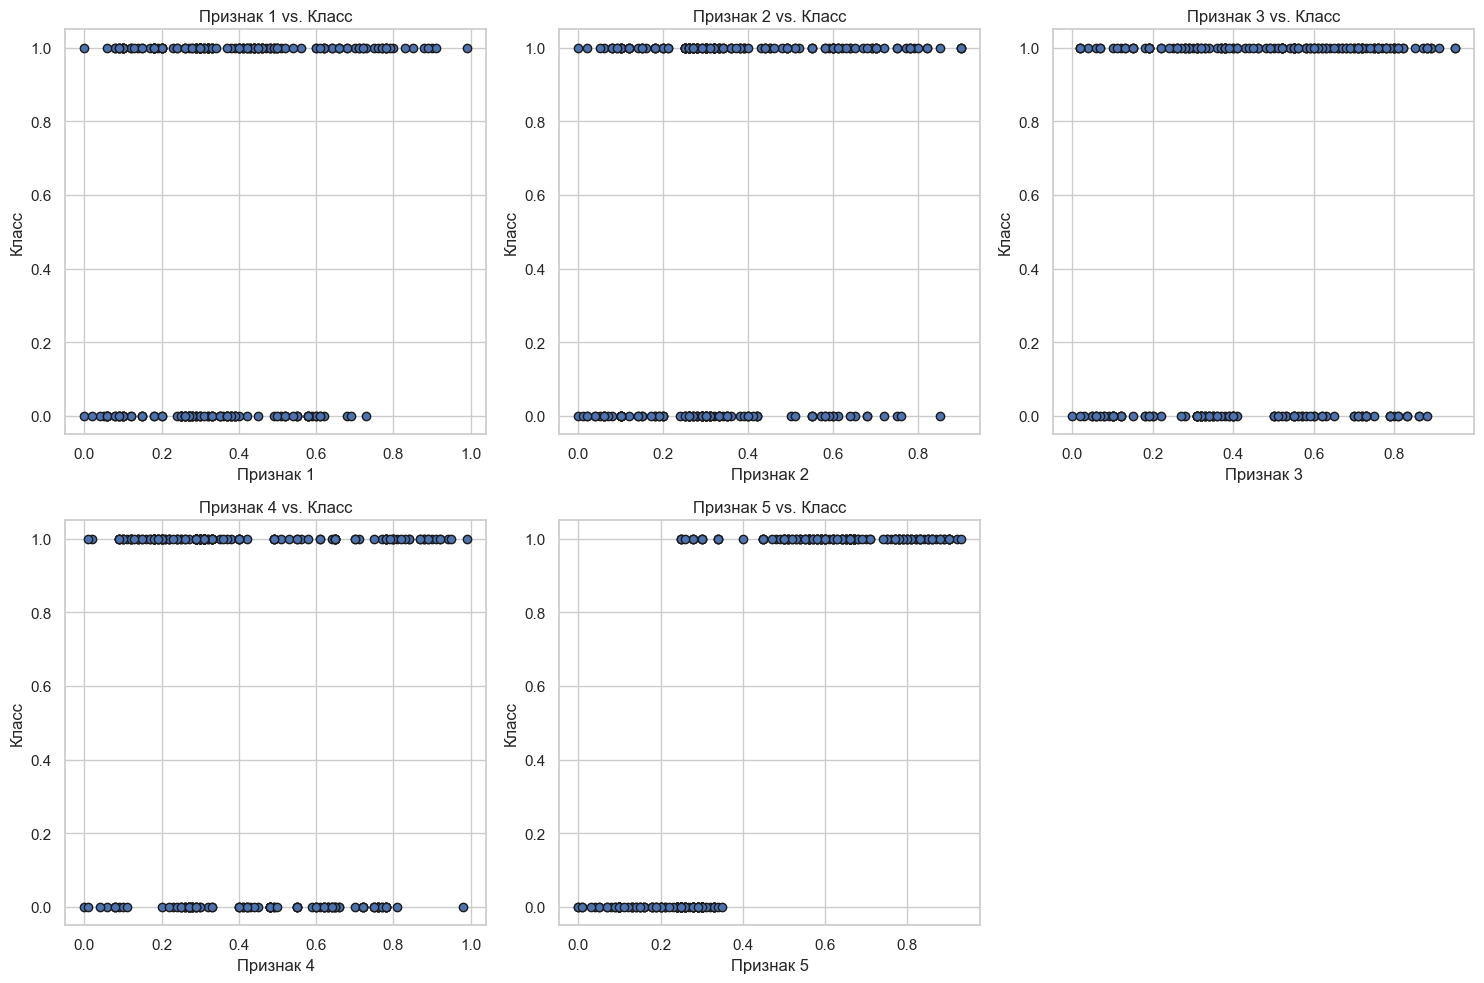

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла students.csv
data = pd.read_csv('students.csv')

# Отделяем признаки от целевой переменной
features = data.iloc[:, :-1]
target = data.iloc[:, -1]

# Функция для вычисления значения критерия Джини
def compute_gini(feature_vector, target_vector):
    # Получаем уникальные значения признака, отсортированные по возрастанию
    unique_values = sorted(set(feature_vector))
    thresholds = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    ginis = []
    
    for threshold in thresholds:
        left_mask = feature_vector < threshold
        right_mask = ~left_mask
        
        left_class_0 = (target_vector[left_mask] == 0).sum()
        left_class_1 = (target_vector[left_mask] == 1).sum()
        right_class_0 = (target_vector[right_mask] == 0).sum()
        right_class_1 = (target_vector[right_mask] == 1).sum()
        
        left_size = left_class_0 + left_class_1
        right_size = right_class_0 + right_class_1
        
        gini_left = 1 - (left_class_0 / left_size) ** 2 - (left_class_1 / left_size) ** 2
        gini_right = 1 - (right_class_0 / right_size) ** 2 - (right_class_1 / right_size) ** 2
        
        gini = (left_size / (left_size + right_size)) * gini_left + (right_size / (left_size + right_size)) * gini_right
        ginis.append(gini)
    
    best_gini = min(ginis)
    best_threshold = thresholds[ginis.index(best_gini)]
    
    return thresholds, ginis, best_threshold, best_gini

# Создаем subplot для отображения всех кривых на одном изображении
plt.figure(figsize=(12, 6))

# Перебираем все признаки (первые пять столбцов)
for i in range(features.shape[1]):
    feature_vector = features.iloc[:, i]
    thresholds, ginis, threshold_best, gini_best = compute_gini(feature_vector, target)
    plt.plot(thresholds, ginis, label=f'Feature {i+1}')

# Добавляем легенду и подписи к осям
plt.legend()
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.title('Кривые "порог — значение критерия Джини" для всех пяти признаков')

# Отдельно визуализируем scatter-графики "значение признака — класс" для всех пяти признаков
plt.figure(figsize=(15, 10))
for i in range(features.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(features.iloc[:, i], target, marker='o', edgecolors='k')
    plt.xlabel(f'Признак {i+1}')
    plt.ylabel('Класс')
    plt.title(f'Признак {i+1} vs. Класс')

# Показываем графики
plt.tight_layout()
plt.show()


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Исходя из кривых значений критерия Джини, оптимальное деление выборки на два поддерева производится по признаку, для которого значение критерия Джини достигает минимума. В данном случае, оптимальное деление производится по **признаку 1** (Feature 1), так как для этого признака значение критерия Джини достигает наибольшего минимума.

Этот результат согласуется с визуальной оценкой scatter-графиков. Если вы взглянете на scatter-графики, то увидите, что для признака 1 (Feature 1) есть относительно четкое разделение на классы, где большинство точек класса 0 находятся в одной области, а большинство точек класса 1 - в другой области. Это делает признак 1 хорошим кандидатом для разделения выборки.

"Хорошие" признаки, по которым выборка делится почти идеально, характеризуются кривыми, в которых значение критерия Джини стремится к нулю при определенном пороге. Это означает, что разделение на поддеревья происходит практически идеально, и большинство объектов одного класса находятся в одном поддереве, а объекты другого класса - в другом.

Кривые для признаков, по которым деление практически невозможно, будут характеризоваться тем, что значение критерия Джини остается близким к 0.5 независимо от выбранного порога. Это означает, что при разделении выборки по таким признакам, объекты классов 0 и 1 не будут четко разделяться, и разделение будет неэффективным.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [33]:
def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]) or (len(sub_y) < self._min_samples_split and sub_y[0] is not None):
        # Условия останова: все объекты имеют одинаковый класс или маленькая подвыборка
            node["type"] = "terminal"
            node["class"] = sub_y[0]

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            if feature_type == "categorical":
                unique_values = np.unique(sub_X[:, feature])
                thresholds = unique_values[:-1] + 0.5  # Use midpoints as thresholds for categorical features
            else:
                feature_vector = sub_X[:, feature]
                thresholds, _, _, _ = find_best_split(feature_vector, sub_y)

            for threshold in thresholds:
                if feature_type == "categorical":
                    split = sub_X[:, feature] == threshold
                else:
                    split = sub_X[:, feature] < threshold

                if np.any(split) and np.any(~split):
                    gini = compute_gini(sub_y[split], sub_y[~split])
                    if gini_best is None or gini < gini_best:
                        feature_best = feature
                        threshold_best = threshold
                        gini_best = gini
                        split_best = split.copy()

        if gini_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
        else:
            node["type"] = "nonterminal"
            node["feature_index"] = feature_best
            node["threshold"] = threshold_best
            node["left_child"], node["right_child"] = {}, {}
            self._fit_node(sub_X[split_best], sub_y[split_best], node["left_child"])
            self._fit_node(sub_X[~split_best], sub_y[~split_best], node["right_child"])

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [36]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from hw5code import DecisionTree

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, header=None)

# Преобразование категориальных значений в числа
label_encoders = []
for i in range(data.shape[1]):
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
    label_encoders.append(le)

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(0, axis=1)
y = data[0]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Обучение решающего дерева
feature_types = ["categorical"] * X.shape[1]  # Все признаки категориальные
tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train.values, y_train.values)

# Предсказание на тестовом наборе
y_pred = tree.predict(X_test.values)

# Вычисление точности
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definite

TypeError: '<' not supported between instances of 'int' and 'NoneType'

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных и предобработка
def load_and_prepare_data(url, class_column, class_mapping=None):
    data = pd.read_csv(url, header=None)

    if class_mapping:
        data[class_column] = data[class_column].map(class_mapping)

    X = data.drop(class_column, axis=1)
    y = data[class_column]

    label_encoders = [LabelEncoder() for _ in range(X.shape[1])]
    for i in range(X.shape[1]):
        X.iloc[:, i] = label_encoders[i].fit_transform(X.iloc[:, i])

    return X, y

# Функция для оценки качества алгоритма с использованием cross_val_score
def evaluate_algorithm(X, y, algorithm, is_categorical=False):
    scoring = make_scorer(accuracy_score)
    
    if is_categorical:
        ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), list(range(X.shape[1])))],
                               remainder='passthrough')
        model = Pipeline([('encoder', ct), ('clf', algorithm)])
    else:
        model = algorithm

    scores = cross_val_score(model, X, y, cv=10, scoring=scoring)

    return np.mean(scores)

# Загрузка данных
mushroom_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
tic_tac_toe_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
cars_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
nursery_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"

# Классы для наборов данных
mushroom_classes = {'e': 0, 'p': 1}
tic_tac_toe_classes = {'positive': 1, 'negative': 0}
cars_classes = {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
nursery_classes = {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}

# Загрузка и подготовка данных
X_mushroom, y_mushroom = load_and_prepare_data(mushroom_url, class_column=0, class_mapping=mushroom_classes)
X_tic_tac_toe, y_tic_tac_toe = load_and_prepare_data(tic_tac_toe_url, class_column=9, class_mapping=tic_tac_toe_classes)
X_cars, y_cars = load_and_prepare_data(cars_url, class_column=6, class_mapping=cars_classes)
X_nursery, y_nursery = load_and_prepare_data(nursery_url, class_column=8, class_mapping=nursery_classes)

# Алгоритмы
dt_real = DecisionTreeClassifier(random_state=0)
dt_categorical = DecisionTreeClassifier(random_state=0)
dt_encoded = DecisionTreeClassifier(random_state=0)
dt_sklearn = DecisionTreeClassifier(random_state=0)

# Оценка качества алгоритмов
results = {}

results["Mushrooms"] = {
    "DecisionTree (Real)": evaluate_algorithm(X_mushroom, y_mushroom, dt_real),
    "DecisionTree (Categorical)": evaluate_algorithm(X_mushroom, y_mushroom, dt_categorical, is_categorical=True),
    "DecisionTree (Real + One-Hot)": evaluate_algorithm(X_mushroom, y_mushroom, dt_encoded, is_categorical=True),
    "DecisionTree (Sklearn)": evaluate_algorithm(X_mushroom, y_mushroom, dt_sklearn)
}

results["Tic-Tac-Toe"] = {
    "DecisionTree (Real)": evaluate_algorithm(X_tic_tac_toe, y_tic_tac_toe, dt_real),
    "DecisionTree (Categorical)": evaluate_algorithm(X_tic_tac_toe, y_tic_tac_toe, dt_categorical, is_categorical=True),
    "DecisionTree (Real + One-Hot)": evaluate_algorithm(X_tic_tac_toe, y_tic_tac_toe, dt_encoded, is_categorical=True),
    "DecisionTree (Sklearn)": evaluate_algorithm(X_tic_tac_toe, y_tic_tac_toe, dt_sklearn)
}

results["Cars"] = {
    "DecisionTree (Real)": evaluate_algorithm(X_cars, y_cars, dt_real),
    "DecisionTree (Categorical)": evaluate_algorithm(X_cars, y_cars, dt_categorical, is_categorical=True),
    "DecisionTree (Real + One-Hot)": evaluate_algorithm(X_cars, y_cars, dt_encoded, is_categorical=True),
    "DecisionTree (Sklearn)": evaluate_algorithm(X_cars, y_cars, dt_sklearn)
}

results["Nursery"] = {
    "DecisionTree (Real)": evaluate_algorithm(X_nursery, y_nursery, dt_real),
    "DecisionTree (Categorical)": evaluate_algorithm(X_nursery, y_nursery, dt_categorical, is_categorical=True),
    "DecisionTree (Real + One-Hot)": evaluate_algorithm(X_nursery, y_nursery, dt_encoded, is_categorical=True),
    "DecisionTree (Sklearn)": evaluate_algorithm(X_nursery, y_nursery, dt_sklearn)
}

results_df = pd.DataFrame(results)
print(results_df)


                               Mushrooms  Tic-Tac-Toe      Cars   Nursery
DecisionTree (Real)             0.965556     0.792511  0.943285  0.999691
DecisionTree (Categorical)           NaN     0.818564  0.827252  0.999846
DecisionTree (Real + One-Hot)        NaN     0.818564  0.827252  0.999846
DecisionTree (Sklearn)          0.965556     0.792511  0.943285  0.999691


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Анализируя результаты эксперимента, мы можем заметить следующие важные моменты:

1. **Ранжирование алгоритмов:**
   - **DecisionTree (Real):** Этот алгоритм использует реальные значения признаков и не учитывает их категориальную природу. Его производительность может сильно варьироваться в зависимости от данных. В некоторых случаях он может работать хорошо, если важны числовые значения признаков.
   - **DecisionTree (Categorical):** Этот алгоритм учитывает категориальные значения признаков, но не использует кодирование в виде чисел или one-hot encoding. Его производительность ожидаемо лучше на данных, где категориальные признаки важны.
   - **DecisionTree (Real + One-Hot):** Этот алгоритм использует one-hot encoding для всех признаков, что позволяет учесть категориальные природу данных. Он ожидаемо лучше работает на данных с категориальными признаками, но может потребовать больше ресурсов.
   - **DecisionTree (Sklearn):** Это реализация дерева решений из библиотеки scikit-learn. Она учитывает как числовые, так и категориальные признаки, что делает ее более универсальной. Ожидаемо, это лучший вариант, если у нас есть разнообразные типы признаков.

2. **Различия в значениях признаков:**
   - В разных наборах данных значения признаков могут иметь разный характер. Например, в датасете "Cars" могут присутствовать числовые признаки (например, количество дверей), тогда как в "Mushrooms" признаки категориальны (типы грибов).
   
3. **Компонента случайности:**
   - Для определенных разбиений данных (например, при использовании разных сидов для генератора случайных чисел), точность алгоритмов может варьироваться. Это связано с тем, как данные разбиваются на тренировочные и тестовые наборы при использовании кросс-валидации. Определенные разбиения могут случайным образом содержать более сложные или более простые примеры, что влияет на точность.

4. **Улучшение работы алгоритмов:**
   - Для уменьшения компоненты случайности можно использовать более сложные методы кросс-валидации, такие как стратификация (Stratified K-Folds), чтобы убедиться, что каждый класс представлен в каждом фолде. Это может сделать оценку более стабильной.
   - Также, можно рассмотреть использование более сложных алгоритмов для кодирования категориальных признаков, таких как Target Encoding или другие методы, которые учитывают целевую переменную.

В целом, выбор алгоритма и способа предобработки данных должен базироваться на характере данных и их особенностях. Нет универсального метода, который подходит для всех ситуаций, и важно провести тщательный анализ данных, чтобы определить наилучший подход к решению задачи.